## Tarea 11.8

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
plt.style.use('seaborn-whitegrid')

Use el método de Adams-Moulton de tres pasos descrito en clase para resolver el siguiente problema de valor inicial:

$$
y'(t) = te^{3t} - 2y\,,\quad 0 \leq t \leq 1\,, \quad y(0) = 0\,.
$$

Recuerde que este método usa $w_{i+1}$ para calcular $w_{i+1}$ tal que es necesario resolver algebráicamente la ecuación resultante y así obtener una expresión explícita para $w_{i + 1}$ que se pueda usar en el código.

In [132]:
def f(t,y):
    return t*np.exp(3*t) - 2*y

Primero verificamos si acaso esta ecuación posee una solución exacta ocupando Sympy, no obstante esta solo sera utilizada con fines comparativos.

In [133]:
t,y = sy.symbols('t y')
y = sy.Function('y')
eq = sy.Eq(sy.Derivative(y(t), t),t*sy.exp(3*t) - 2*y(t))
sol = sy.dsolve(eq,ics={y(0):0})
y_sol = sy.lambdify(t,sol.rhs)

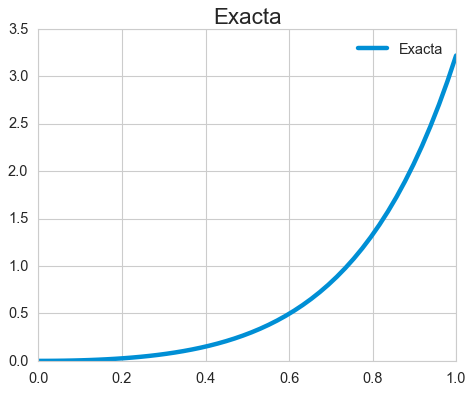

In [160]:
t0 = np.linspace(0,1,50)
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(6,5))
plt.plot(t0,y_sol(t0),label='Exacta');
plt.title('Exacta');
plt.legend(loc='best')

Copiamos desde la clase la función del metodo de Adams-Moulton.

In [161]:
def rk4_step(f, fi, t, w, h):
    
    k1 = h*fi
    k2 = h*f(t+h/2, w+k1/2)
    k3 = h*f(t+h/2, w+k2/2)
    k4 = h*f(t + h, w + k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

def apc4(f, a, b, yo, N):
    
    h = (b-a)/N
    i = 0
    w = yo
    t = a
    
    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    fi = 0
    fim1 = 0
    fim2 = 0
    fim3 = 0
    
    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3 = fim2
        fim2 = fim1
        fim1 = fi
        fi = f(t,w)
        if i < 3:
            w += rk4_step(f, fi, t, w, h)
        else:
            # Predictor Adams-Bashforth de 4 pasos
            w = ws[i] + h*(55*fi - 59*fim1 +37*fim2 - 9*fim3)/24
            # Corrector Adams-Moulton de 3 pasos
            w = ws[i] + h*(9*f(t + h, w) + 19*fi - 5*fim1 + fim2)/24
        t += h
        
    ws[N] = w
    ts[N] = t
    
    return ts, ws

Donde f es la ecuación diferencial, a y b son 0 y 1 respectivamente, y0 es 0 y por ultimo N es el número de subintervalos para [a,b].

Text(0.5, 1.0, 'Aproximación')

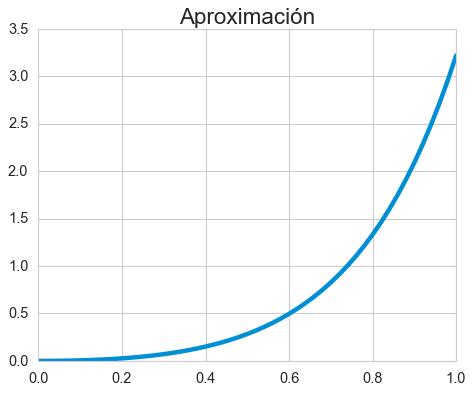

In [162]:
N = 50;
a,b = 0,1;
y0 = 0;
res_approx = apc4(f,a,b,y0,N);
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(6,5))
plt.plot(*res_approx);
plt.title('Aproximación')

Graficamos ambos resultados y el error relativo.

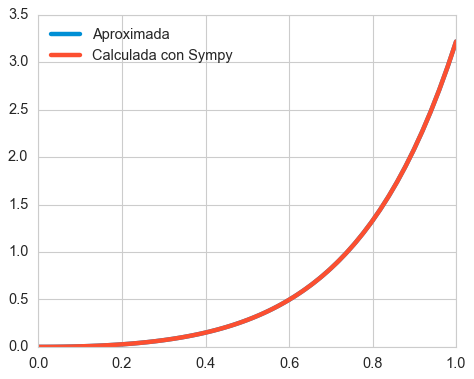

In [163]:
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(6,5))
plt.plot(*res_approx,label='Aproximada');
plt.plot(t0,y_sol(t0),label='Calculada con Sympy');
plt.legend(loc='best')
plt.show()

<ipython-input-174-da7cebf36361>:1: RuntimeWarning: invalid value encountered in true_divide
  err_abs = np.abs(y_sol(t0)-res_approx[1][0:-1])/y_sol(t0)


Text(0.5, 1.0, 'Error Absoluto')

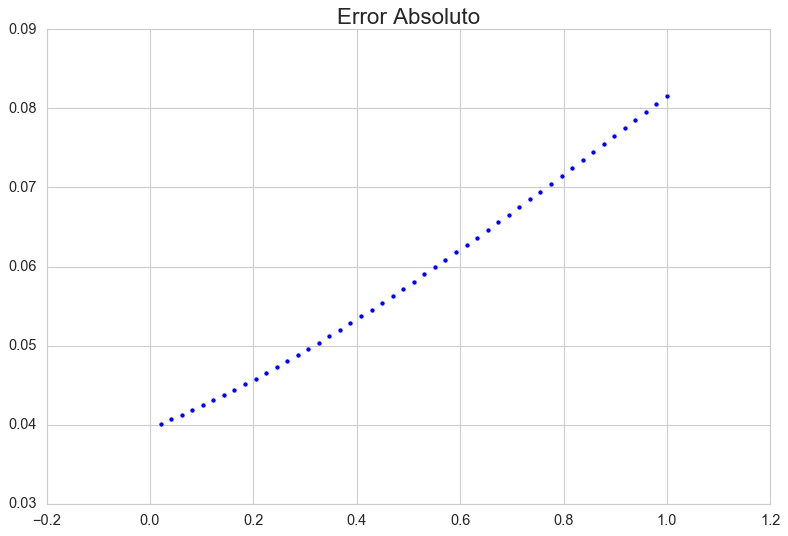

In [174]:
err_abs = np.abs(y_sol(t0)-res_approx[1][0:-1])/y_sol(t0)
plt.scatter(t0,err_abs);
plt.title('Error Absoluto')